In [1]:
current_path = "C://Users//lxanas//Desktop//DS_Practice//attention//Final_project//"

Task 3.1

In [2]:
raw_data = open(current_path + "cadata.txt", 'r', encoding="utf8")
raw_data = [x.rstrip() for x in raw_data]
raw_data = raw_data[27:]
print(raw_data[0:2])
# Q3.1

['1\t4.5260000000000000e+005\t8.3252000000000006e+000\t4.1000000000000000e+001\t8.8000000000000000e+002\t1.2900000000000000e+002\t3.2200000000000000e+002\t1.2600000000000000e+002\t3.7880000000000003e+001 -1.2223000000000000e+002', '2\t3.5850000000000000e+005\t8.3013999999999992e+000\t2.1000000000000000e+001\t7.0990000000000000e+003\t1.1060000000000000e+003\t2.4010000000000000e+003\t1.1380000000000000e+003\t3.7859999999999999e+001 -1.2222000000000000e+002']


Task 3.2

In [3]:
for i in range(len(raw_data)):
    raw_data[i] = raw_data[i].replace("\t", ",")
    raw_data[i] = raw_data[i].replace(" ", ",")

print(raw_data[0:2])

for i in range(len(raw_data)):
    temp = raw_data[i].split(',')
    for j in range(len(temp)):
        temp[j] = eval(temp[j])
    raw_data[i] = ''.join(str(temp))[1:-1]

# print(raw_data)

new_file = open(current_path + "cadata.csv", 'w')

raw_data.insert(0,
                "block group ID,median house value,median income,housing median age,total rooms,total bedrooms,population,households,latitude,longitude")
for x in raw_data:
    new_file.writelines(x + '\n')

new_file.close()

['1,4.5260000000000000e+005,8.3252000000000006e+000,4.1000000000000000e+001,8.8000000000000000e+002,1.2900000000000000e+002,3.2200000000000000e+002,1.2600000000000000e+002,3.7880000000000003e+001,-1.2223000000000000e+002', '2,3.5850000000000000e+005,8.3013999999999992e+000,2.1000000000000000e+001,7.0990000000000000e+003,1.1060000000000000e+003,2.4010000000000000e+003,1.1380000000000000e+003,3.7859999999999999e+001,-1.2222000000000000e+002']


Task 3.3

In [4]:
first_data = open(current_path + "cadata.csv", 'r')
first_data = [x.rstrip() for x in first_data]
first_data[0] = first_data[0] + ',ocean_proximity'
append_data = open(current_path + "ocean_proximity.csv", 'r')
append_data = [x.rstrip() for x in append_data]
print(append_data[:3])

for i in range(1, len(first_data)):
    first_data[i] = first_data[i] + "," + append_data[i].split(',')[1]
    first_data[i] = first_data[i].replace(" ", '')

print(first_data[:3])

new_file = open(current_path + "data_for_analysis.csv", 'w')

for x in first_data:
    new_file.writelines(x + '\n')

new_file.close()

['block_group_id,ocean_proximity', '1,NEAR BAY', '2,NEAR BAY']
['block group ID,median house value,median income,housing median age,total rooms,total bedrooms,population,households,latitude,longitude,ocean_proximity', '1,452600.0,8.3252,41.0,880.0,129.0,322.0,126.0,37.88,-122.23,NEARBAY', '2,358500.0,8.3014,21.0,7099.0,1106.0,2401.0,1138.0,37.86,-122.22,NEARBAY']


Task 3.4

median house value    206855.816909
median income              3.870671
households               499.539680
dtype: float64

median house value    1.331615e+10
median income         3.609323e+00
households            1.461760e+05
dtype: float64

median house value    500001.000
median income              3.125
households               306.000
Name: 0, dtype: float64

median house value    0.977763
median income         1.646657
households            3.410438
dtype: float64



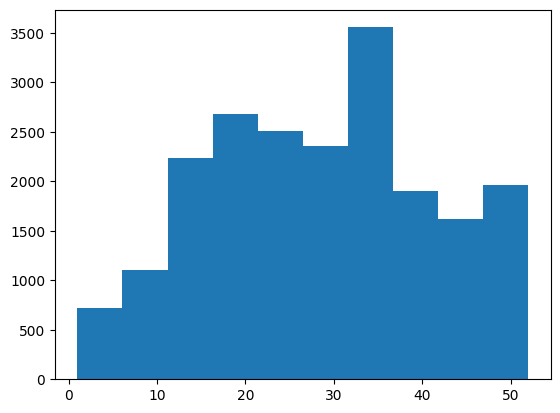

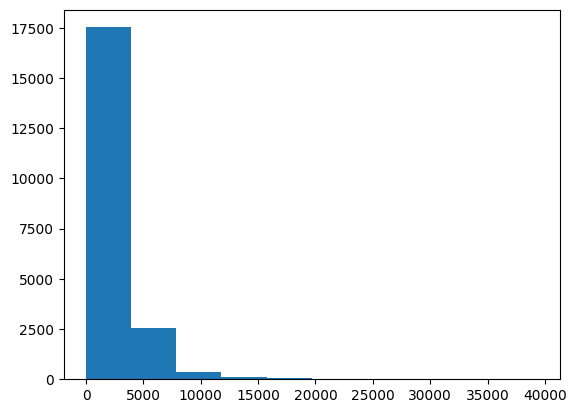

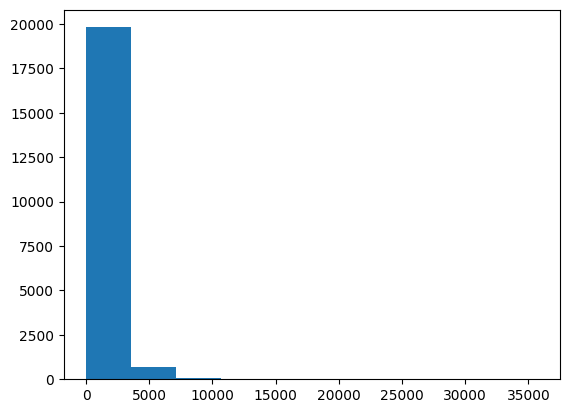

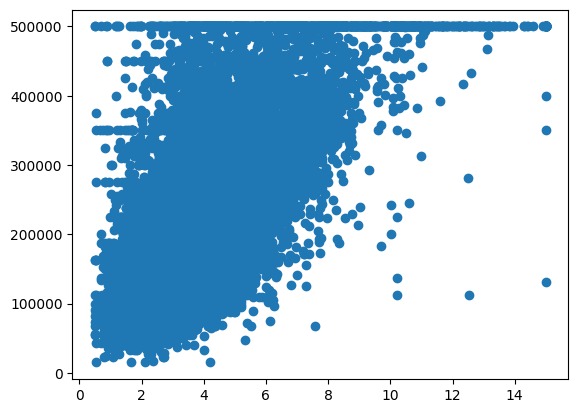

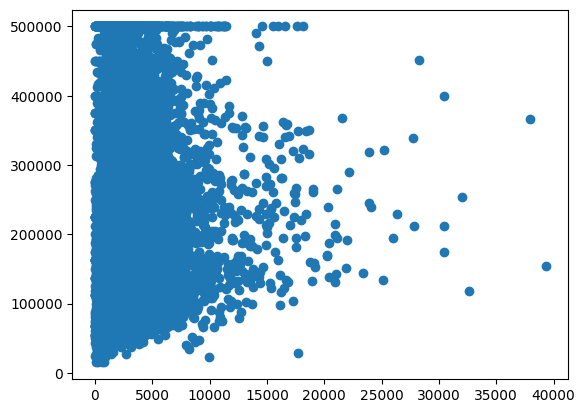

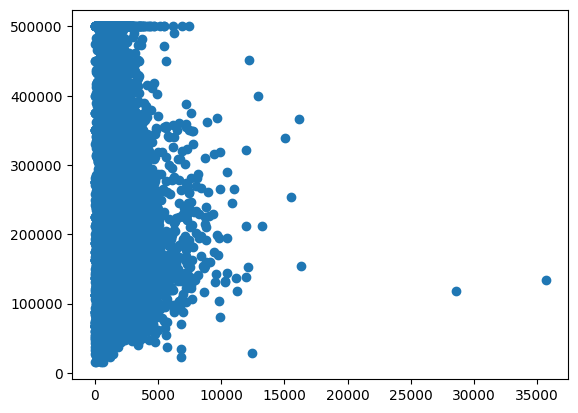

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(current_path + "data_for_analysis.csv")

ndf = pd.DataFrame()
ndf['median house value'] = df['median house value']
ndf['median income'] = df['median income']
ndf['households'] = df['households']
print(ndf.mean(), end='\n\n')
print(ndf.var(), end='\n\n')
print(ndf.mode().iloc[0], end='\n\n')
print(ndf.skew(), end='\n\n')

ndf2 = pd.DataFrame()
ndf2['housing median age'] = df['housing median age']
ndf2['total rooms'] = df['total rooms']
ndf2['population'] = df['population']

plt.hist(ndf2['housing median age'])
plt.show()

plt.hist(ndf2['total rooms'])
plt.show()

plt.hist(ndf2['population'])
plt.show()

plt.scatter(df['median income'], df['median house value'])
plt.show()

plt.scatter(df['total rooms'], df['median house value'])
plt.show()

plt.scatter(df['population'], df['median house value'])
plt.show()

Task 3.5

In [11]:
import random

train = open(current_path + 'train.csv', 'w')
test = open(current_path + 'test.csv', 'w')

raw = open(current_path + 'data_for_analysis.csv', 'r')
raw = [i.rstrip() for i in raw]
# print(raw[:5])
# print(raw[:5])
raw = raw[1:]
head = "block group ID,median house value,median income,housing median age,total rooms,total bedrooms,population,households,latitude,longitude,ocean_proximity\n"
train.write(head)
test.write(head)
for i in raw:
    num = random.random()
    if num < 0.8:
        train.write(i + '\n')
    else:
        test.write(i + '\n')

(16637, 13)
(16637,)

Train on 16637 samples, validate on 4028 samples
Epoch 1/100
16637/16637 [==============================] - 1s 68us/step - loss: 207163.5088 - mse: 56253833216.0000 - val_loss: 203326.3710 - val_mse: 54530564096.0000
Epoch 2/100
16637/16637 [==============================] - 1s 34us/step - loss: 199389.9322 - mse: 53150015488.0000 - val_loss: 182016.6661 - val_mse: 46467555328.0000
Epoch 3/100
16637/16637 [==============================] - 1s 31us/step - loss: 151421.9058 - mse: 36368998400.0000 - val_loss: 112048.5549 - val_mse: 23411949568.0000
Epoch 4/100
16637/16637 [==============================] - 1s 35us/step - loss: 95025.8721 - mse: 17287368704.0000 - val_loss: 79973.2140 - val_mse: 12479583232.0000
Epoch 5/100
16637/16637 [==============================] - 1s 40us/step - loss: 73727.4832 - mse: 10725187584.0000 - val_loss: 64514.2897 - val_mse: 8485227520.0000
Epoch 6/100
16637/16637 [==============================] - 1s 31us/step - loss: 61657.2083 - m

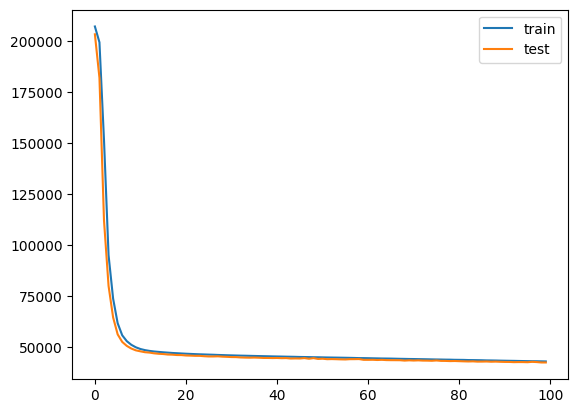

In [13]:
import pandas as pd
import tensorflow as tf  #### tensorflow==1.14 keras==2.3.1 python==3.7
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from matplotlib import pyplot as plt


def read_data(file):
    raw_data = pd.read_csv(file)
    raw_data.drop('block group ID', axis=1, inplace=True)
    # raw_data.info()
    # print(raw_data[:5])
    numeric_features = raw_data.dtypes[raw_data.dtypes != 'object'].index
    # print(numeric_features)

    numeric_features = numeric_features[1:]
    # print(numeric_features)
    raw_data[numeric_features] = raw_data[numeric_features].apply(lambda x: (x - x.mean()) / (x.std()))  # z-score
    # raw_data.info()
    # print(raw_data[:5])
    # print(type(numeric_features))
    ocean = list(set(raw_data['ocean_proximity']))
    # print(ocean)
    raw_data = pd.get_dummies(raw_data)
    return raw_data


train = read_data(current_path + "train.csv")
test = read_data(current_path + "test.csv")


# raw_data.info()
# print(raw_data[:30])

# print(np.array((raw_data)))
def create_dataset(data):
    x, y = [], []
    for i in range(len(data)):
        x.append(data[i][1:])
        y.append(data[i][0])
    return np.array(x), np.array(y)


x, y = create_dataset(np.array(train))
x_test, y_test = create_dataset(np.array(test))
print(x.shape)
print(y.shape)

def create_model():
    model = Sequential()

    model.add(Dense(128, input_shape=(13,), activation='relu', name='dense_1'))
    model.add(Dense(64, activation='relu', name='dense_2'))
    model.add(Dense(32, activation='relu', name='dense_3'))
    model.add(Dense(1, activation='linear', name='dense_output'))

    model.compile(optimizer='adam', loss='mae', metrics=['mse'])
    return model

model = create_model()
# history = model.fit(x, y, epochs=100, batch_size=128, validation_split=0.05)
history = model.fit(x, y, epochs=100, batch_size=128, validation_data=(x_test, y_test))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()